In [1]:
#tweet cleaning
#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
#https://towardsdatascience.com/basic-data-cleaning-engineering-session-twitter-sentiment-data-95e5bd2869ec

#Topic Modeilling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

#Cleaning
#Puncuation
#lower case
#stopwords
#abbreviations

# Importing modules
import pandas as pd
import os

# Load the regular expression library
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from nltk.corpus import stopwords
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis.gensim
import pickle 
import pyLDAvis
#import spacy
#from scispacy.abbreviation import AbbreviationDetector


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\megha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
diabetes2018 = pd.read_csv('all_diabetes2018.csv')

In [5]:
# Print head
diabetes2018.head(10)

Post ID          Author  \
0   7ng7rl  penguinsarefun   
1   7nlbda         MrCanoe   
2   7nnmor        Heylola2   
3  dwcllds       [deleted]   
4  dzokqh6        Heylola2   
5   7nnogn       jdong4321   
6   7npao8     douglas4321   
7   7nr0q2       BearFan34   
8   7ntfa9         SeanP93   
9   7nuxr5        Mike3400   

                                                                                                  Text  \
0  Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1  Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2  I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3  Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4  I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5  My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6  I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
7                                                                                                  NaN   
8  Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
9                                                                                                  NaN   

   Score      Publish Date  \
0      5   2018-01-01 9:16   
1      2   2018-01-02 0:58   
2     12   2018-01-02 8:55   
3      1  2018-03-26 22:23   
4      1  2018-05-27 16:56   
5      1   2018-01-02 9:02   
6      1  2018-01-02 12:51   
7     49  2018-01-02 17:04   
8      7   2018-01-03 0:43   
9     18   2018-01-03 6:23   

                                                                       Permalink  \
0                                         /r/diabetes/comments/7ng7rl/t2_newbie/   
1   /r/diabetes/comments/7nlbda/looking_into_keto_diet_how_serious_are_risks_of/   
2                       /r/diabetes/comments/7nnmor/great_start_to_the_new_year/   
3               /r/diabetes/comments/7nnmor/great_start_to_the_new_year/dwcllds/   
4               /r/diabetes/comments/7nnmor/great_start_to_the_new_year/dzokqh6/   
5           /r/diabetes/comments/7nnogn/i_think_i_have_diabetes_but_im_overseas/   
6   /r/diabetes/comments/7npao8/when_is_the_best_time_to_take_my_10mg_jardiance/   
7  /r/diabetes/comments/7nr0q2/researchers_just_accidentally_found_an_effective/   
8  /r/diabetes/comments/7ntfa9/new_young_type_ii_here_looking_for_help_guidance/   
9                                         /r/diabetes/comments/7nuxr5/seen_this/   

    Flair  Total No. of Comments  \
0  Type 2                    2.0   
1  Type 2                    6.0   
2  Type 2                    7.0   
3     NaN                    NaN   
4     NaN                    NaN   
5  Type 2                    6.0   
6  Type 2                    2.0   
7  Type 2                    5.0   
8  Type 2                   17.0   
9  Type 2                    2.0   

                                                                                                 Title  \
0                                                                                            T2 Newbie   
1                                       Looking into Keto diet, how serious are risks of hypoglycemia?   
2                                                                        Great start to the new year!!   
3                                                                                                  NaN   
4                                                                                                  NaN   
5           I think I have diabetes but I'm overseas travelling for another 45 days, how urgent is it?   
6                                                when is the best time to take my 10mg jardiance Pill?   
7  R

In [6]:
list(diabetes2018.columns)

['Post ID',
 'Author',
 'Text',
 'Score',
 'Publish Date',
 'Permalink',
 'Flair',
 'Total No. of Comments',
 'Title',
 'Url']

In [7]:
#drop unnecessary columns
diabetes2018 = diabetes2018.drop(columns = ['Author', 'Score', 'Permalink', 'Flair', 'Total No. of Comments', 'Title', 'Url'])
diabetes2018

Post ID  \
0       7ng7rl   
1       7nlbda   
2       7nnmor   
3      dwcllds   
4      dzokqh6   
...        ...   
12514  ecv4dtv   
12515  ecve2zu   
12516  ecwd91h   
12517  ecwiejq   
12518  ecxmy0m   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

           Publish Date  
0       2018-01-01 9:16  
1       2018-01-02 0:58  
2       2018-01-02 8:55  
3      2018-03-26 22:23  
4      2018-05-27 16:56  
...                 ...  
12514   2018-12-30 2:02  
12515   2018-12-30 5:56  
12516  2018-12-30 13:32  
12517  2018-12-30 14:31  
12518   2018-12-31 0:23  

[12519 rows x 3 columns]

In [8]:
#remove any blank texts
diabetes2018 = diabetes2018[diabetes2018['Text'].notna()]
diabetes2018.head(10)

Post ID  \
0    7ng7rl   
1    7nlbda   
2    7nnmor   
3   dwcllds   
4   dzokqh6   
5    7nnogn   
6    7npao8   
8    7ntfa9   
10   7ny6jm   
11   7o0j4z   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10  I made a post [here](https://www.reddit.com/r/diabetes/comments/7jfqbt/types_2_when_metformin_an...   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

        Publish Date  
0    2018-01-01 9:16  
1    2018-01-02 0:58  
2    2018-01-02 8:55  
3   2018-03-26 22:23  
4   2018-05-27 16:56  
5    2018-01-02 9:02  
6   2018-01-02 12:51  
8    2018-01-03 0:43  
10  2018-01-03 14:11  
11  2018-01-03 20:26

In [9]:
#remove any duplicate posts
diabetes2018 = diabetes2018.drop_duplicates(subset=['Text'])

In [10]:
#remove url from text
diabetes2018['Text'] = diabetes2018['Text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
diabetes2018['Text'] = diabetes2018['Text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
diabetes2018

Post ID  \
0       7ng7rl   
1       7nlbda   
2       7nnmor   
3      dwcllds   
4      dzokqh6   
...        ...   
12514  ecv4dtv   
12515  ecve2zu   
12516  ecwd91h   
12517  ecwiejq   
12518  ecxmy0m   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

           Publish Date  
0       2018-01-01 9:16  
1       2018-01-02 0:58  
2       2018-01-02 8:55  
3      2018-03-26 22:23  
4      2018-05-27 16:56  
...                 ...  
12514   2018-12-30 2:02  
12515   2018-12-30 5:56  
12516  2018-12-30 13:32  
12517  2018-12-30 14:31  
12518   2018-12-31 0:23  

[11892 rows x 3 columns]

In [11]:
#move date column
diabetes2018 = diabetes2018[['Post ID', 'Publish Date', 'Text']]
diabetes2018

Post ID      Publish Date  \
0       7ng7rl   2018-01-01 9:16   
1       7nlbda   2018-01-02 0:58   
2       7nnmor   2018-01-02 8:55   
3      dwcllds  2018-03-26 22:23   
4      dzokqh6  2018-05-27 16:56   
...        ...               ...   
12514  ecv4dtv   2018-12-30 2:02   
12515  ecve2zu   2018-12-30 5:56   
12516  ecwd91h  2018-12-30 13:32   
12517  ecwiejq  2018-12-30 14:31   
12518  ecxmy0m   2018-12-31 0:23   

                                                                                                      Text  
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...  
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...  
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...  
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...  
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...  
...                                                                                                    ...  
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...  
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...  
12516                          A perfect example of not letting the perfect become the enemy of the good.   
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...  
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...  

[11892 rows x 3 columns]

In [12]:
#view gensim stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'used', 'ours', 'few', 'inc', 'ourselves', 'could', 'further', 'somewhere', 'de', 'nor', 'about', 'first', 'hers', 'through', 'its', 'yourself', 'ten', 'when', 'along', 'how', 'another', 'off', 'hasnt', 'therein', 'for', 'thence', 'many', 'some', 'always', 'only', 'already', 'however', 'twenty', 'nothing', 'once', 'part', 'eight', 'thick', 'has', 'whom', 'bill', 'would', 'three', 'they', 'unless', 'beyond', 're', 'were', 'thereupon', 'on', 'own', 'please', 'we', 'describe', 'everything', 'must', 'somehow', 'take', 'get', 'formerly', 'former', 'didn', 'else', 'noone', 'find', 'cannot', 'ever', 'under', 'mill', 'will', 'within', 'using', 'enough', 'with', 'every', 'yourselves', 'from', 'whenever', 'or', 'least', 'became', 'had', 'towards', 'whereupon', 'other', 'among', 'fill', 'upon', 'almost', 'all', 'last', 'five', 'who', 'namely', 'see', 'themselves', 'anyhow', 'being', 'per', 'still', 'now', 'detail', 'others', 'whereby', 'ltd', 'beforehand', 'sixty', 'anything', 'besides

In [13]:
#stopword libraries https://stackabuse.com/removing-stop-words-from-strings-in-python/
#gensim stopwords
from gensim.parsing.preprocessing import remove_stopwords


#text = "Nick likes to play football, however he is not too fond of tennis."
#filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)
#def remove_stopwords(text):
    #text = [word for word in text if word not in stopword]
    #print(text)
    #return text
    
#diabetes2018['text_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_stopwords(x))
#diabetes2018.head(10)

diabetes2018['text_gens_nonstop'] = diabetes2018['Text'].apply(lambda x: remove_stopwords(x))
diabetes2018

<ipython-input-13-138d4719541e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_gens_nonstop'] = diabetes2018['Text'].apply(lambda x: remove_stopwords(x))


Post ID      Publish Date  \
0       7ng7rl   2018-01-01 9:16   
1       7nlbda   2018-01-02 0:58   
2       7nnmor   2018-01-02 8:55   
3      dwcllds  2018-03-26 22:23   
4      dzokqh6  2018-05-27 16:56   
...        ...               ...   
12514  ecv4dtv   2018-12-30 2:02   
12515  ecve2zu   2018-12-30 5:56   
12516  ecwd91h  2018-12-30 13:32   
12517  ecwiejq  2018-12-30 14:31   
12518  ecxmy0m   2018-12-31 0:23   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

                                                                                         text_gens_nonstop  
0      Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...  
1      Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...  
2      I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...  
3      Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .  
4      I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...  
...                                                                                                    ...  
12514  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :...  
12515  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower...  
12516                                                        A perfect example letting perfect enemy good.  
12517  Same. Mine 9.3. Was 5.5 90 days 5.2 5.3 since(about year doctor discontinued metformin). My bloo...  
12518  &gt;What i'd like lower Tuojeo dose want figure that. Can recommend good diet follow sugars chec...  

[11892 rows x 4 columns]

In [14]:
#Remove punctuations & upper case
#Remove stopwords
#Lammetization/stemming - Tranforming any form of a word to its root word
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#remove puncutation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

diabetes2018['text_processed'] = diabetes2018['text_gens_nonstop'].apply(lambda x: remove_punct(x))
diabetes2018.head(10)

<ipython-input-15-0ffbc2dcd318>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_processed'] = diabetes2018['text_gens_nonstop'].apply(lambda x: remove_punct(x))


Post ID      Publish Date  \
0    7ng7rl   2018-01-01 9:16   
1    7nlbda   2018-01-02 0:58   
2    7nnmor   2018-01-02 8:55   
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5    7nnogn   2018-01-02 9:02   
6    7npao8  2018-01-02 12:51   
8    7ntfa9   2018-01-03 0:43   
10   7ny6jm  2018-01-03 14:11   
11   7o0j4z  2018-01-03 20:26   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  
0   Hey all Happy New years Just wanted hi I diagnosed type  DM Thursday Ive crazy fatigued thirsty ...  
1   Hello Im  lbs male Type  diabetes Ive looking Keto way lose weight hopefully lower medication im...  
2   I ac checked today its  Threefour months ago  Im taken metformin and Ill tested months see Im ex...  
3        Hey old post congrats This motivating Side note desk cycle for I got sure reasonable time use   
4   I stick fitbit ankle count steps I end entire time Im desk days  hours not usually fast I k step...  
5   My mom diabetes I check lot symptoms type  months I lazyin denial I know Im actual idiot go Just...  
6   I type  insulin doctor told bed I heard people best directly largest meal day Wondering consensu...  
8   Hey y’all I’m yearsold couple pounds shy  pounds stranger saw they’d assume I’m healthy young gu...  
10                                                                                          I post here  
11  Im recently diagnosed Type  Diabetic Nov  My prescription coverage dropped Jardiance formulary p...

In [16]:
#switch to lower case
diabetes2018['text_processed'] = \
diabetes2018['text_processed'].map(lambda x: x.lower())
diabetes2018

<ipython-input-16-432712019d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_processed'] = \


Post ID      Publish Date  \
0       7ng7rl   2018-01-01 9:16   
1       7nlbda   2018-01-02 0:58   
2       7nnmor   2018-01-02 8:55   
3      dwcllds  2018-03-26 22:23   
4      dzokqh6  2018-05-27 16:56   
...        ...               ...   
12514  ecv4dtv   2018-12-30 2:02   
12515  ecve2zu   2018-12-30 5:56   
12516  ecwd91h  2018-12-30 13:32   
12517  ecwiejq  2018-12-30 14:31   
12518  ecxmy0m   2018-12-31 0:23   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

                                                                                         text_gens_nonstop  \
0      Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1      Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2      I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3      Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4      I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
...                                                                                                    ...   
12514  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :...   
12515  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower...   
12516                                                        A perfect example letting perfect enemy good.   
12517  Same. Mine 9.3. Was 5.5 90 days 5.2 5.3 since(about year doctor discontinued metformin). My bloo...   
12518  &gt;What i'd like lower Tuojeo dose want figure that. Can recommend good diet follow sugars chec...   

                                                                                            text_processed  
0      hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...  
1      hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...  
2      i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...  
3           hey old post congrats this motivating side note desk cycle for i got sure reasonable time use   
4      i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...  
...                                                                                                    ...  
12514     in  mos ac went ish  cholesterol  pts triglycerides  pts bad cholesterol   and this eating bacon  
12515  what said i dont keto  i carbs  instead   ac went    

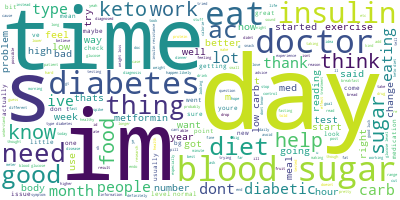

In [17]:
# Join the different processed titles together.
long_string = ','.join(list(diabetes2018['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [18]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

diabetes2018['text_tokenized'] = diabetes2018['text_processed'].apply(lambda x: tokenization(x.lower()))
diabetes2018.head(10)

<ipython-input-18-b2a5f6600d7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_tokenized'] = diabetes2018['text_processed'].apply(lambda x: tokenization(x.lower()))


Post ID      Publish Date  \
0    7ng7rl   2018-01-01 9:16   
1    7nlbda   2018-01-02 0:58   
2    7nnmor   2018-01-02 8:55   
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5    7nnogn   2018-01-02 9:02   
6    7npao8  2018-01-02 12:51   
8    7ntfa9   2018-01-03 0:43   
10   7ny6jm  2018-01-03 14:11   
11   7o0j4z  2018-01-03 20:26   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  \
0   hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...   
1   hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...   
2   i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...   
3        hey old post congrats this motivating side note desk cycle for i got sure reasonable time use    
4   i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...   
5   my mom diabetes i check lot symptoms type  months i lazyin denial i know im actual idiot go just...   
6   i type  insulin doctor told bed i heard people best directly largest meal day wondering consensu...   
8   hey y’all i’m yearsold couple pounds shy  pounds stranger saw they’d assume i’m healthy young gu...   
10                                                                                          i post here   
11  im recently diagnosed type  diabetic nov  my prescription coverage dropped jardiance formulary p...   

                                                                                         text_tokenized  


In [64]:
#remove nlk stopwords
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also',"don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'lol', 'youre', 'youll', 'doesnt'])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
#remove nlk stopwords
def remove_nlk_stopwords(text):
    text = [word for word in text if word not in stopword]
    print(text)
    return text
    
diabetes2018['text_nlk_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))
diabetes2018.head(10)

['happy', 'new', 'years', 'wanted', 'diagnosed', 'type', 'dm', 'thursday', 'crazy', 'fatigued', 'thirsty', 'x', 'months', 'fasting', 'glucose', 'morning', 'started', 'metformin', 'trulicity', 'eating', 'feel', 'better', 'generally', 'hungry', 'tired', 'fasting', 'glucose', 'morning', 'since', 'looking', 'forward', 'journey']
['lbs', 'male', 'type', 'diabetes', 'looking', 'keto', 'way', 'lose', 'weight', 'hopefully', 'lower', 'medication', 'currently', 'metformin', 'gliclazide', 'jardiance', 'day', 'pills', 'total', 'risky', 'keto', 'diet', 'medication', 'jardiancealso', 'called', 'empagliflozin', 'new', 'ac', 'risen', 'mid', 'one', 'reasons', 'got', 'new', 'doctor', 'late', 'old', 'doctor', 'metformins', 'gliclazides', 'day', 'getting', 'ac', 'new', 'doctor', 'told', 'acs', 'bad', 'diabetic', 'gliclazide', 'great', 'heart', 'reduced', 'problem', 'wasnt', 'eating', 'great', 'bad', 'habitstoo', 'snacking', 'meal', 'bed', 'work', 'hour', 'days', 'home', 'till', 'ac', 'went', 'till', 'hit'

['works']
['generally', 'blood', 'sugar', 'rate', 'change', 'commonly', 'night']
['know', 'true', 'everyone', 'eat', 'high', 'carb', 'foods', 'makes', 'hungry', 'chemical', 'stop', 'telling', 'hungry', 'bunch', 'insulin', 'snack', 'later', 'eat', 'come', 'insulin', 'come', 'hungry', 'snacks', 'craving', 'badly', 'annoying']
['diabetes', 'types', 'reason', 'energy', 'enter', 'cells', 'used', 'type', 'damage', 'receptors', 'cells', 'hyperinsulinemia', 'insulin', 'blood', 'longer', 'respond', 'insulin', 'reason', 'feeling', 'ravenous', 'especially', 'carby', 'meal', 'body', 'unable', 'use', 'food', 'easiest', 'answer', 'exercise', 'little', 'meal', 'activate', 'glut', 'receptors', 'better', 'glucose', 'cells', 'therefore', 'actually', 'use', 'energy', 'consume', 'answer', 'trade', 'carbs', 'fats', 'absence', 'carbs', 'converted', 'ketone', 'bodies', 'energy', 'instead', 'despite', 'reddit', 'tells', 'keto', 'takes', 'weeks', 'adapt', 'especially', 'brain', 'biggest', 'consumer', 'energy',

['overweight', 'active', 'little', 'bit', 'walk', 'lot', 'try', 'toes', 'day', 'stats', 'cm', 'kg', 'years', 'old', 'atm', 'family', 'members', 'type', 'diabetes', 'maternal', 'grandfather', 'paternal', 'grandparents']
['dietician', 'told', 'aim', 'low', 'carbs', 'high', 'fat', 'check', 'nutritional', 'label', 'fat', 'carbs', 'eat', 'long', 'list', 'foods', 'eat', 'avoid', 'sadly', 'cereal', 'avoid', 'list', 'egg', 'plus', 'looks', 'broccoli', 'potato', 'pumpkin']
['keto']
['high', 'proteinfat', 'low', 'carb', 'refers', 'type', 'diet', 'makes', 'body', 'enter', 'stage', 'burning', 'fat', 'fuel', 'instead', 'glucose', 'ketosis']
['advice', 'bit', 'casual', 'follow', 'best', 'way', 'works', 'test', 'hour', 'meal', 'specific', 'foods', 'combos', 'food', 'contrast', 'keto', 'typically', 'carbs', 'g', 'day', 'means', 'lots', 'salads', 'proteins', 'eggs', 'beef', 'chicken', 'fish', 'pork', 'fat', 'dairy', 'cheeses', 'greek', 'yogurt', 'mfp', 'app', 'help', 'manage', 'keto', 'got', 'blood', '

['bet', 'far', 'help', 'use', 'cgm', 'lifesavers', 'send', 'warning', 'trending', 'upwards', 'downwards']
['idea', 'pack', 'sugary', 'drinksfood', 'try', 'sugary', 'eat', 'unconsciousdie', 'people', 'search', 'faster', 'ambulancevan', 'phone', 'use', 'sirene', 'brother', 'able', 'tell', 'far', 'sound']
['update', 'gave', 'call', 'answer', 'called', 'mum', 'slumped', 'bike', 'managed', 'car', 'theres', 'ambulances', 'available', 'theyre', 'going', 'coke', 'sugar', 'thanks', 'support', 'help', 'guys', 'really', 'appreciate', 'hopefully', 'hell', 'alright', 'hell', 'start', 'listening', 'parents', 'bring', 'high', 'sugar', 'sweets', 'goes', 'lucky', 'able', 'friend', 'ran', 'miles', 'tell', 'situation', 'help']
['slurring', 'speech', 'incoherent', 'breathing', 'fast', 'short', 'signs', 'extremely', 'low', 'reaction', 'run', 'woods', 'start', 'yelling', 'bring', 'type', 'food']
['normal', 'tbh', 'theres', 'high', 'chance', 'ok', 'people', 'searching', 'forest', 'carrying', 'sugary', 'gluca

['thank', 'taking', 'time', 'read', 'hope', 'guys', 'good', 'day', 'info', 'year', 'old', 'female', 'diagnosed', 'type', 'diabetes', 'years', 'ago', 'overweight', 'life', 'recently', 'started', 'going', 'gym', 'husband', 'good', 'feelings', 'succeed', 'attaining', 'healthier', 'lifestyle', 'medication', 'taking', 'metformin', 'invokana', 'lisinopril', 'prescribed', 'glipizide', 'diabetes', 'disease', 'runs', 'strongly', 'family', 'diagnosed', 'seriously', 'dealing', 'extreme', 'depression', 'point', 'lay', 'bed', 'day', 'care', 'personal', 'hygiene', 'avoid', 'eating', 'basically', 'stopped', 'taking', 'care', 'visit', 'doctor', 'days', 'ago', 'told', 'aic', 'scared', 'hell', 'course', 'morning', 'received', 'doctors', 'office', 'schedule', 'appointment', 'liver', 'ultrasound', 'high', 'liver', 'enzyme', 'levels', 'scared', 'going', 'tell', 'terrible', 'able', 'fix', 'want', 'consoled', 'told', 'ok', 'care', 'think', 'venting', 'fool', 'thinking', 'invincible', 'thinking', 'life', 'poi

['home', 'blood', 'glucose', 'tester']
['yes', 'test', 'blood', 'glucose']
['cultivate', 'radishes', 'doctor', 'diabetes', 'carbs', 'refined', 'healthy', 'keto', 'undeniably', 'lot', 'cholesterol', 'mean', 'works', 'folks', 'good', 'blood', 'comes', 'someones', 'ass', 'diet', 'think', 'super', 'healthy', 'especially', 'case']
['try', 'potato', 'potatoes', 'combine', 'salad', 'protein', 'fats']
['shot', 'cleared', 'plot', 'potatoes', 'left', 'experiment', 'plant', 'add', 'radishes', 'sweet', 'potatoes', 'radishes', 'store', 'throgh', 'winter', 'understand', 'pickle', 'em', 'least']
['potatoes', 'hit', 'blood', 'sugar', 'fast', 'sugar', 'seen', 'bloody', 'sugar', 'spike', 'fast', 'potatoes', 'orange', 'juice', 'two', 'potatoes', 'dinner', 'diabetic', 'person', 'bad', 'idea', 'sure', 'opposed', 'eating', 'fewer', 'carbs', 'diabetes', 'disorder', 'means', 'body', 'struggles', 'metabolize', 'carbs', 'safe', 'manner']
['diabetics', 'different', 'ate', 'lasagna', 'time', 'diagnosed', 'little'

['think', 'nano', 'scientists', 'exploring']
['thanks', 'thought', 'beta', 'cells']
['insulin', 'assist', 'insist', 'cue', 'bouncy', 'ukelelewhistling', 'duet', 'montage', 'people', 'walking', 'grass', 'barefoot', 'exercising', 'eating', 'lettuce', 'wrap', 'seizures', 'etc', 'type', 'diabetes', 'insist', 'cue', 'preferably', 'brown', 'actors', 'holding', 'glucose', 'meters', 'reading', 'ranging', 'insist', 'insist', 'insist', 'cut', 'original', 'actor', 'insist', 'normal', 'glucose', 'levels']
['']
['suffering', 'type', 'diabetes', 'years', 'slowly', 'hbac', 'getting', 'higher', 'reading', 'glucose', 'machine', 'doctor', 'started', 'new', 'medication', 'invokana', 'anybody', 'experience', 'medication', 'started', 'mg', 'starting', 'dose', 'told', 'weeks', 'needs', 'increasing', 'mg', 'metformin', 'worried', 'increased', 'urinary', 'output', 'caused', 'invokana', 'worry', 'want', 'caught', 'short', 'away', 'toilet', 'thanks', 'advance', 'reply']
['blood', 'sugar', 'drink', 'pee', 'lot',

['yeah', 'guess', 'diet', 'related', 'health', 'issues', 'keto', 'go', 'sorry', 'friend', 'gallbladder', 'issue', 'diabetic', 'headache', 'issues', 'kind', 'think', 'guy', 'hates', 'eat', 'tend', 'glutton', 'hopefully', 'relevant', 'advice']
['doctor', 'terrible', 'human', 'stop', 'seeing', 'immediately', 'treat', 'patient', 'deserve', 'better', 'part', 'reason', 'people', 'lose', 'weight', 'metformin', 'sideeffects', 'thats', 'use', 'metformin', 'though', 'doctors', 'warning', 'bullshit', 'bullying', 'extended', 'release', 'metformin', 'greatly', 'reduces', 'discomfort', 'mg', 'day', 'point', 'zero', 'issues', 'stomach', 'digestive', 'tract', 'likely', 'able', 'life', 'diabetes', 'lot', 'help', 'symptoms', 'diet', 'exercise', 'adjusted', 'remove', 'carbs', 'increase', 'insulin', 'sensitivity', 'greatly', 'reduce', 'high', 'blood', 'sugar', 'symptoms', 'majority', 'type', 'diabetics', 'relatively', 'easily', 'unbothered', 'satisfying', 'life', 'symptoms', 'lot', 'remove', 'medication',

['drastic', 'change', 'went', 'ketogenic', 'diet', 'consume', 'gg', 'carbs', 'day', 'transition', 'period', 'things', 'adjusted', 'transitioned', 'fat', 'adapted', 'state', 'hankering', 'snacks', 'sweet', 'savory', 'relationship', 'food', 'changed', 'numbers', 'went', 'control', 'ac', 'pre', 'diabetic', 'numbers', 'lost', 'lbs', 'know', 'drastic', 'check', 'rketo', 'good', 'info', 'consider']
['agree', 'bringing', 'snacks', 'desk', 'work', 'pretty', 'diabetic', 'snack', 'unsalted', 'nuts', 'cream', 'wheat', 'oatmeal', 'homemade', 'lowcarb', 'rye', 'cookies', 'fruit', 'sweet', 'cravings', 'decreased', 'bit', 'definitely', 'favorite', 'sweet', 'snack', 'cottage', 'cheese', 'bit', 'fruit', 'mixed', 'usually', 'g', 'carbs', 'strong', 'weeks', 'hardest', 'adjusting']
['oooh', 'lowcarb', 'rye', 'cookies', 'speak', 'edit', 'rye', 'pof', 'thanks', 'autocorrect', '']
['tried', 'requesting', 'longer', 'near', 'tempting', 'food', 'stuffs', 'sight', 'mind']
['sorry', 'late', 'reply', 'pretty', 'us

['yeah', 'need', 'better', 'case', 'yesterday', 'hadnt', 'eaten', 'awhile', 'maybe', 'hours', 'bc', 'busy', 'schoolfinals', 'walking', 'home', 'started', 'feeling', 'sick', 'check', 'levels', 'walking', 'though']
['yeah', 'want', 'carry', 'snacks', 'good', 'luck']
['early', 'warning', 'system']
['first', 'time', 'glipizide', 'started', 'severe', 'hypos', 'worst', 'think', 'weird', 'thing', 'hit', 'days', 'rice', 'lunch', 'hours', 'later', 'fainting', 'time', 'careful', 'glipizide', 'testing']
['recently', 'worried', 'signs', 'diabetes', 'wanted', 'ask', 'advice', 'seeing', 'doctor', 'weigh', 'pounds', 'exercise', 'havent', 'signs', 'diabetes', 'recently', 'definitely', 'noticed', 'weird', 'feelings', 'hands', 'feet', 'head', 'handa', 'started', 'light', 'burning', 'sensation', 'feeling', 'slightly', 'numb', 'swelling', 'red', 'numb', 'havent', 'noticed', 'major', 'symptoms', 'advice', 'appreciated']
['high', 'glucose', 'blood', 'sugar', 'levels', 'neglecting', 'meds', 'nearly', 'year',

['works', 'try', 'avoid', 'taking', 'roads', 'trips', 'though']
['yeah', 'feels', 'looks']
['remember', 'doctor', 'saying', 'metformin', 'gi', 'affects', 'patients', 'maybe', 'starting', 'gi', 'okrecovers', 'watch', 'ketoacidosis', 'blood', 'panel', 'regularly', 'esp', 'start', 'new', 'exercise', 'program', 'fat', 'burning', 'increase', 'chances', 'drink', 'plenty', 'water', 'eat', 'healthy', 'grains', 'body', 'simple', 'carbs', 'break', 'overall', 'levels', 'controlled', 'body', 'natural', 'insulin', 'production', 'thanks', 'metformin', 'experience', 'course', 'talk', 'doctor']
['neccessarily', 'types', 'oral', 'meds', 'diabetes', 'metformin', 'relatively', 'mild', 'effects', 'pretty', 'manageable', 'people', 'doctors', 'generally', 'start', 'patient', 'metformin', 'first']
['docs', 'started', 'glipizide', 'dxd', 'surprised', 'wasnt', 'metformin', 'glipizide', 'work', 'scary', 'lows', 'asked', 'switched', 'met', 'gi', 'problems', 'regular', 'formula', 'soon', 'heard', 'er', 'formula',

['overlook', 'frozen', 'vegetables', 'though', 'use', 'lot', 'frozen', 'peas', 'completely', 'agree', 'keto', 'lchf', 'working', 'think', 'lot', 'pretty', 'heavy', 'exercise', 'regime', 'though', 'balancing', 'act', 'know']
['love', 'lentils', 'especially', 'curried', 'lentils', 'sweet', 'potatoes', 'right', 'eating', 'time', 'reintroducing']
['yes', 'took', 'kettlebells', 'walking', 'kettlebells', 'job', 'done']
['everybodys', 'different', 'tolerate', 'lentils', 'chick', 'peas', 'pretty', 'well', 'bit', 'black', 'beans', 'kidney', 'beans', 'test', 'one', 'thing', 'noticed', 'lost', 'weight', 'started', 'exercising', 'tolerance', 'carbs', 'went', 'watch', 'meter', 'afraid', 'try', 'new', 'things']
['rowing', 'biking', 'havent', 'looked', 'kettleballs', 'though', 'might', 'good', 'winter', 'activity']
['chose', 'kettlebells', 'rowing', 'work', 'cardio', 'resistance', 'strength', 'lower', 'price']
['congrats', 'proud', 'cuz', 'ac', 'went', 'months', 'lost', 'pounds', 'cut', 'sugar', 'n',

[]
['concerned', 'doctor', 'health', 'mess']
['scared', 'ada', 'standards', 'healthy', 'adult', 'fbs', 'typically', 'good', 'go', 'dr', 'ac', 'checked']
['tested', 'morning', 'thats', 'coming', 'night', 'lowest', 'summer', '']
['breakfast', 'break', 'fast', 'blood', 'sugar', 'normal', 'level', 'diabetics', 'fasting', 'anyway']
['saying', 'doctor', 'possible', 'meantime', 'test', 'meals', 'test', 'hour', 'interval', 'begin', 'eat', 'hours', 'sometimes', 'bg', 'levels', 'rise', 'fasting', 'liver', 'stores', 'glucose', 'immediately', 'releases', 'sure', 'body', 'operating', 'optimally']
['thank', 'advice', 'truly', 'appreciate', 'came', 'apparently', 'prediabetic', 'levels', 'fasting', 'blood', 'glucose', 'scary', 'prospect']
['ac', 'better', 'indicator', 'single', 'glucose', 'reading', 'concerned', 'done']
['holly', 'shit']
['great', 'months']
['look', 'normal', 'reading', 'doctor', 'wouldnt', 'flag', 'worry', 'thats', 'reason', 'worried', 'relax', 'fasting', 'blood', 'sugar', 'showed', 

['creamy', 'cauliflower', 'soup', 'good']
['canned', 'soup', 'though', 'packed', 'sugar', 'sure', 'known']
['vegetables', 'avoid', 'reduce', 'starchy', 'vegetables', 'broth', 'soups', 'instead', 'cream', 'soups', 'want', 'noodles', 'soup', 'ones', 'local', 'oriental', 'store', 'mushy', 'use', 'fewer', 'use', 'barley', 'beefy', 'type', 'soups', 'crackers', 'cheese', 'instead', 'bread', 'fruit', 'good', 'downsize', 'portion', 'average', 'apple', 'today', 'servings', 'look', 'small', 'apples', 'cut', 'half', 'share', 'combine', 'apple', 'peanut', 'butter', 'reduce', 'spike', 'limit', 'oranges', 'major', 'activity', 'lawn', 'mowing', 'juice', 'recipe', 'difficult', 'maintain', 'keto', 'level', 'diet', 'fruit', 'think', 'healthy', 'completely', 'food', 'group']
['tom', 'hanks', 'good', 'example', 'doctors', 'assume', 'normal', 'weight', 'cant', 'everybody', 'tested', 'periodically', 'unfortunately', 'folks', 'overweight', 'obese', 'time', 'diagnosis', 'little', 'hard', 'ignore']
['endo', 'e

['similar', 'situation', 'years', 'old', 'ft', 'weigh', 'lbs', 'lift', 'weights', 'x', 'week', 'cardio', 'told', 'prediabetic', 'gp', 'month', 'blood', 'test', 'recommend', 'going', 'gp', 'asking', 'hcab', 'cholesterol', 'mine', 'high', 'thyroid', 'hormone', 'blood', 'tests', 'gp', 'shocked', 'results', 'said', 'genetic', 'pcos', 'went', 'irregular', 'periods', 'years', 'female', 'possibility', 'pcos', 'pcos', 'cause', 'insulin', 'resistance', 'lean', 'women', 'history', 'type', 'diabetes', 'family', 'started', 'low', 'carb', 'diet', 'blood', 'test', 'months', 'hopefully', 'improved']
['hard', 'time', 'first', 'lbsi', 'went', 'hiking', 'rock', 'climbing', 'multiple', 'times', 'week', 'genetic', 'doctors', 'essentially', 'fat', 'ask', 'advanced', 'blood', 'tests', 'type', 'wanted', 'certain', 'antibodies', 'wanted', 'thyroid', 'ok', 'everything', 'fine', 'guess', 'got', 'huge', 'bummer', 'think', 'extra', 'incentive', 'stay', 'fit', 'healthy']
['sorry', 'happened', 'fair', 'please', 'do

['quacks', 'went', 'supposed', 'low', 'carb', 'friendly', 'dietician', 'suggested', 'eat', 'fruit', 'sweet', 'potato']
['span']
['sorry', 'long', 'post', 'cant', 'completely', 'understand', 'shouldshouldnt', 'scares', 'help', 'help', 'history', 'july', 'year', 'visited', 'gp', 'talk', 'depression', 'talking', 'mentioned', 'experiencing', 'symptoms', 'knew', 'normal', 'diabeticspeeing', 'lot', 'big', 'lad', 'likes', 'sugar', 'asked', 'tested', 'feeling', 'turns', 'feeling', 'correct', 'late', 'august', 'got', 'confirmation', 'diabetic', 'remember', 'correctly', 'doctor', 'said', 'diabetes', 'level', 'cant', 'know', 'means', 'relation', 'everything', 'early', 'october', 'type', 'confirmed', 'doctor', 'pretty', 'sure', 'case', 'far', 'know', 'family', 'history', 'wanted', 'sure', 'wasnt', 'type', 'treatment', 'prescribed', 'g', 'metformin', 'day', 'week', 'pretty', 'rough', 'negative', 'effects', 'gone', 'sent', 'nurse', 'gave', 'accuchek', 'performa', 'nano', 'shown', 'reading', 'gone', 

['skinny', 'diabetic', 'binged', 'sodas', 'candies', 'fasting', 'hours', 'hours', 'straight', 'months', 'stressful', 'routine', 'feel', 'eating', 'got', 'high', 'ate', 'food', 'metformin', 'twice', 'daily', 'mg', 'cannot', 'eat', 'junk', 'anymore', 'loved', 'potatoes', 'corn', 'rice', 'poutine', 'bread', 'feel', 'devastated', 'want', 'breathe', 'according', 'medical', 'sciences', 'logic', 'need', 'careful', 'feel', 'right', 'diagnosed', 'type', 'weeks', 'ago', 'ac', 'weird', 'pointed', 'chest', 'pains', 'taking', 'aspirin', 'supplements', 'feel', 'doomed', 'understand', 'type', 'yet', 'wish', 'understand', 'better', 'bmi', '']
['dxed', 'type', 'bmi', 'currently', 'hover', 'bmi', 'curious', 'thin', 'underweight', 'type', 'weight', 'loss', 'gotten', 'low', 'bmi', 'difference', 'numbers']
['friend', 'boat', 'vegan', 'taste', 'reasons', 'ethical', 'reasons', 'dxed', 'truly', 'loved', 'plant', 'foods', 'good', 'cooking', 'kinds', 'vegan', 'dishes', 'basically', 'foods', 'lost', 'cant', 'eat

['exercise', 'weight', 'loss', 'help', 'alot']
['upping', 'exercise', 'bit', 'going', 'lose', 'weight', 'healthy', 'weight', 'height', 'build', 'lose', 'much', 'converting', 'weight', 'muscle', 'help']
['love', 'cycling', 'hate', 'weight', 'lifting', 'read', 'weight', 'lifting', 'beneficial', 'continue', 'burn', 'sugar', 'hours', 'good', 'weight', 'routine', 'look', 'way', 'enjoy', 'stick', 'long', 'haul', 'love', 'feel', 'exercise', 'kind', 'reap', 'long', 'term', 'health', 'benefits', '']
['cant', 'help', 'monitor', 'wrong', 'country', 'different', 'prices', 'wondering', 'problem', 'bought', 'best', 'monitor', 'afford', 'use', 'often', 'gtwhat', 'begin', 'click', 'getting', 'started']
['bg', 'monitors', 'sold', 'us', 'probably', 'developed', 'countries', 'meet', 'certain', 'accuracy', 'standards', 'noninsulin', 'type', 'need', 'super', 'accurate', 'figure', 'insulin', 'dosage', 'monitor', 'working', 'right', 'lemon', 'maybe', 'bad', 'strips', 'contour', 'next', 'happy', 'never', 'hea

<ipython-input-65-f4fe86f539c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_nlk_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))


Post ID      Publish Date  \
0   7ng7rl   2018-01-01 9:16    
1   7nlbda   2018-01-02 0:58    
2   7nnmor   2018-01-02 8:55    
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5   7nnogn   2018-01-02 9:02    
6   7npao8   2018-01-02 12:51   
8   7ntfa9   2018-01-03 0:43    
10  7ny6jm   2018-01-03 14:11   
11  7o0j4z   2018-01-03 20:26   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [66]:
diabetes2018

Post ID      Publish Date  \
0      7ng7rl   2018-01-01 9:16    
1      7nlbda   2018-01-02 0:58    
2      7nnmor   2018-01-02 8:55    
3      dwcllds  2018-03-26 22:23   
4      dzokqh6  2018-05-27 16:56   
...        ...               ...   
12514  ecv4dtv  2018-12-30 2:02    
12515  ecve2zu  2018-12-30 5:56    
12516  ecwd91h  2018-12-30 13:32   
12517  ecwiejq  2018-12-30 14:31   
12518  ecxmy0m  2018-12-31 0:23    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  I've been crazy fatigued and thirsty x many months. My fasting glucose that morning was 151. I was started on metformin and trulicity and have been eating very well since then. I already feel better, generally less hungry and tired. My fasting glucose has been 100-110 every morning since. I'm looking forward to this journey!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now as a way to lose weight and hopefully lower the medication i'm on. I currently take 3 metformin, 1 Gliclazide and 1 Jardiance a day(5 pills total) How risky is doing the Keto diet if i'm on that much medication? The jardiance(also called empagliflozin) is new as My A1C had risen from mid 5's to 7.0 in 2017. One of the reasons was I got a new doctor in late 2016 and my old doctor had me on 3 metformin's and 2 Gliclazide's a day and on that I was getting 5.4-5.7 A1C but my new doctor told me A1C's in the 5's was bad for a diabetic and that Gliclazide isn't to great for your heart. So he reduced it down to 1. Problem became though I still wasn't eating great with bad habits(too much snacking and having a meal before bed since I work 10 hour days and don't get home till 1 am) so my A1C went back up 

In [67]:
#spacy stopwords
import spacy
sp = spacy.load('en_core_web_sm')

all_spacy_stopwords = sp.Defaults.stop_words
print(len(all_stopwords))
print(all_stopwords)

337
frozenset({'used', 'ours', 'few', 'inc', 'ourselves', 'could', 'further', 'somewhere', 'de', 'nor', 'about', 'first', 'hers', 'through', 'its', 'yourself', 'ten', 'when', 'along', 'how', 'another', 'off', 'hasnt', 'therein', 'for', 'thence', 'many', 'some', 'always', 'only', 'already', 'however', 'twenty', 'nothing', 'once', 'part', 'eight', 'thick', 'has', 'whom', 'bill', 'would', 'three', 'they', 'unless', 'beyond', 're', 'were', 'thereupon', 'on', 'own', 'please', 'we', 'describe', 'everything', 'must', 'somehow', 'take', 'get', 'formerly', 'former', 'didn', 'else', 'noone', 'find', 'cannot', 'ever', 'under', 'mill', 'will', 'within', 'using', 'enough', 'with', 'every', 'yourselves', 'from', 'whenever', 'or', 'least', 'became', 'had', 'towards', 'whereupon', 'other', 'among', 'fill', 'upon', 'almost', 'all', 'last', 'five', 'who', 'namely', 'see', 'themselves', 'anyhow', 'being', 'per', 'still', 'now', 'detail', 'others', 'whereby', 'ltd', 'beforehand', 'sixty', 'anything', 'bes

In [68]:
#remove spacy stopwords from text

def remove_spacy_stopwords(text):
    text = [word for word in text if word not in all_spacy_stopwords]
    #print(text)
    return text
    
diabetes2018['text_nonstop_spacy'] = diabetes2018['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))
diabetes2018.head(25)

<ipython-input-68-48da02d12fbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_nonstop_spacy'] = diabetes2018['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))


Post ID      Publish Date  \
0   7ng7rl   2018-01-01 9:16    
1   7nlbda   2018-01-02 0:58    
2   7nnmor   2018-01-02 8:55    
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5   7nnogn   2018-01-02 9:02    
6   7npao8   2018-01-02 12:51   
8   7ntfa9   2018-01-03 0:43    
10  7ny6jm   2018-01-03 14:11   
11  7o0j4z   2018-01-03 20:26   
12  7o5gve   2018-01-04 11:41   
13  7o7j9d   2018-01-04 17:09   
14  7od6b9   2018-01-05 10:31   
15  7odptz   2018-01-05 11:45   
16  7oixzg   2018-01-06 4:17    
17  7ojezc   2018-01-06 6:08    
18  7osg4c   2018-01-07 10:51   
19  7ot37o   2018-01-07 12:28   
20  7owhco   2018-01-07 21:44   
21  7oy7p2   2018-01-08 4:30    
22  7p396l   2018-01-08 16:41   
23  7p5zg2   2018-01-09 1:18    
24  7ph2hb   2018-01-10 9:21    
25  7pijc2   2018-01-10 12:39   
26  7pq1dz   2018-01-11 10:15   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [69]:
#stemming and lemmitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

diabetes2018['text_stemmed'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: stemming(x))
diabetes2018.head(10)

<ipython-input-69-a8069d4eedd1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_stemmed'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: stemming(x))


Post ID      Publish Date  \
0   7ng7rl   2018-01-01 9:16    
1   7nlbda   2018-01-02 0:58    
2   7nnmor   2018-01-02 8:55    
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5   7nnogn   2018-01-02 9:02    
6   7npao8   2018-01-02 12:51   
8   7ntfa9   2018-01-03 0:43    
10  7ny6jm   2018-01-03 14:11   
11  7o0j4z   2018-01-03 20:26   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [70]:
#lemmitzation
#https://en.wikipedia.org/wiki/Lemmatisation
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

diabetes2018['text_lemmatized'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))
diabetes2018.head(10)

<ipython-input-70-f9e17c835bea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_lemmatized'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))


Post ID      Publish Date  \
0   7ng7rl   2018-01-01 9:16    
1   7nlbda   2018-01-02 0:58    
2   7nnmor   2018-01-02 8:55    
3   dwcllds  2018-03-26 22:23   
4   dzokqh6  2018-05-27 16:56   
5   7nnogn   2018-01-02 9:02    
6   7npao8   2018-01-02 12:51   
8   7ntfa9   2018-01-03 0:43    
10  7ny6jm   2018-01-03 14:11   
11  7o0j4z   2018-01-03 20:26   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [71]:
#begin topic modelling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

import gensim.corpora as corpora

# Create Dictionary
data_words = diabetes2018.text_lemmatized
print(data_words)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

0        [happy, new, year, wanted, diagnosed, type, dm, thursday, crazy, fatigued, thirsty, x, month, fasting, glucose, morning, started, metformin, trulicity, eating, feel, better, generally, hungry, tired, fasting, glucose, morning, looking, forward, journey]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1        [lb, male, type, diabetes, looking, keto, way, lose, weight, hopefully, lower, medication, currently, metformin, gliclazide, jardiance, day, pill, total, risky, keto, diet, medication, jardiancealso, called, empagliflozi

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [72]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.013*"sugar" + 0.011*"blood" + 0.010*"insulin" + 0.008*"ac" + 0.008*"keto" '
  '+ 0.008*"day" + 0.008*"eat" + 0.008*"month" + 0.008*"eating" + '
  '0.007*"carbs"'),
 (1,
  '0.018*"type" + 0.014*"diabetes" + 0.009*"year" + 0.009*"time" + '
  '0.008*"insulin" + 0.007*"blood" + 0.007*"sugar" + 0.006*"doctor" + '
  '0.006*"eat" + 0.006*"need"'),
 (2,
  '0.013*"sugar" + 0.010*"know" + 0.010*"day" + 0.008*"thanks" + '
  '0.008*"diabetes" + 0.007*"blood" + 0.006*"hour" + 0.006*"bg" + '
  '0.006*"thing" + 0.006*"good"'),
 (3,
  '0.015*"carbs" + 0.012*"day" + 0.011*"blood" + 0.009*"test" + 0.008*"sugar" '
  '+ 0.008*"low" + 0.007*"diet" + 0.007*"need" + 0.007*"insulin" + '
  '0.007*"glucose"'),
 (4,
  '0.008*"doctor" + 0.007*"time" + 0.007*"metformin" + 0.007*"going" + '
  '0.006*"diet" + 0.006*"diabetes" + 0.006*"carbs" + 0.006*"ac" + '
  '0.006*"sugar" + 0.005*"insulin"'),
 (5,
  '0.013*"sugar" + 0.008*"time" + 0.008*"blood" + 0.008*"lot" + 0.007*"low" + '
  '0.007*"diet" + 0.007*"ke

In [73]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.068708753272556

Coherence Score:  0.5309885091538759


In [74]:
#mallet LDA model
os.environ.update({'MALLET_HOME':r'C:/Users/megha/mallet-2.0.8/mallet-2.0.8/'})

#mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
mallet_path = 'C:\\Users\\megha\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet.bat' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word, prefix='temp_file_', workers=4)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(9,
  [('good', 0.07303768057379534),
   ('work', 0.05439943428629154),
   ('lot', 0.052884129710071726),
   ('great', 0.03252853823618548),
   ('keto', 0.03141731488029094),
   ('diet', 0.02495201535508637),
   ('post', 0.022881099100919285),
   ('advice', 0.0179816143044752),
   ('dr', 0.015355086372360844),
   ('luck', 0.01500151530457622)]),
 (4,
  [('ac', 0.07063034747686397),
   ('month', 0.05858215470577964),
   ('weight', 0.0498952331063384),
   ('week', 0.04147022874105116),
   ('year', 0.037672428845818055),
   ('diagnosed', 0.03658110703684302),
   ('started', 0.03404924044002095),
   ('ago', 0.02566788894709272),
   ('exercise', 0.02427099703160468),
   ('med', 0.01964379256155055)]),
 (8,
  [('carbs', 0.09185606060606061),
   ('low', 0.07819264069264069),
   ('eat', 0.06917388167388168),
   ('diet', 0.05997474747474747),
   ('carb', 0.05767496392496393),
   ('food', 0.05505952380952381),
   ('eating', 0.05402236652236652),
   ('keto', 0.03936688311688312),
   ('fat', 0.02

In [75]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.555566209787739


In [76]:
#find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=2)

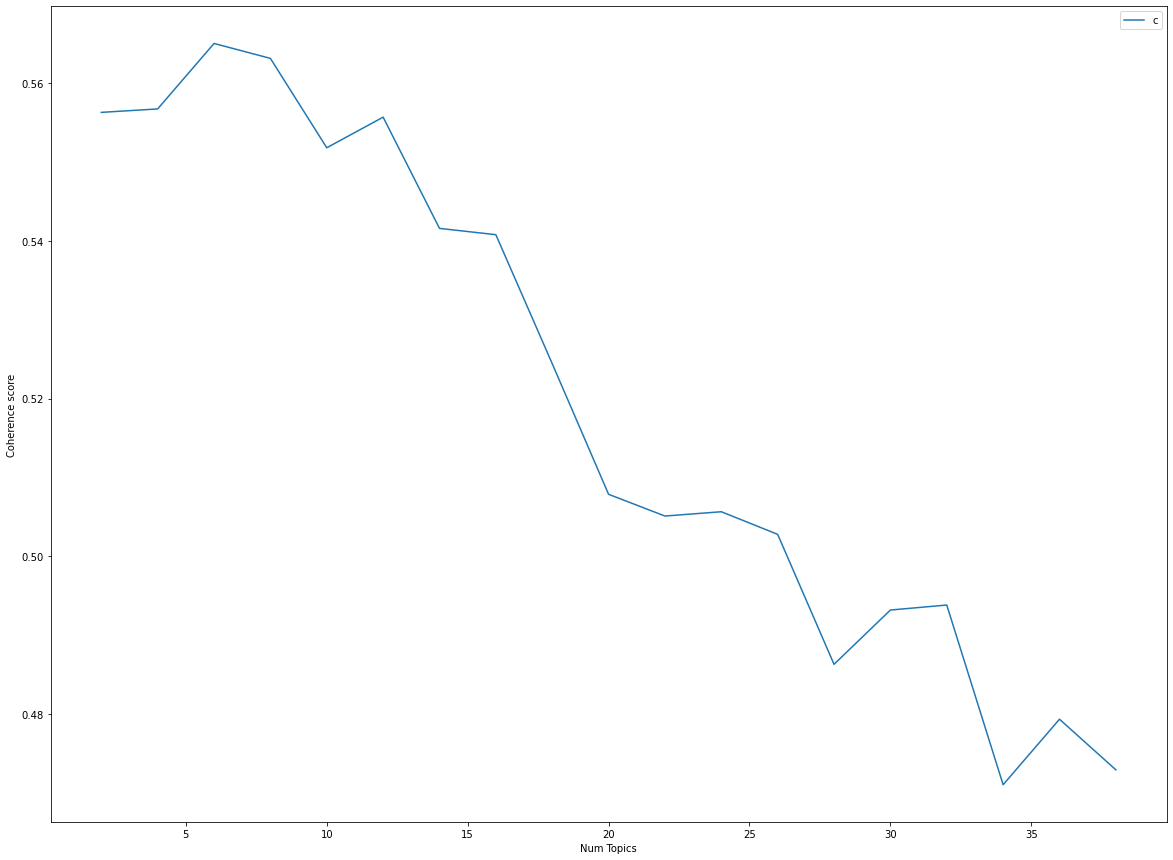

In [50]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5563
Num Topics = 4  has Coherence Value of 0.5568
Num Topics = 6  has Coherence Value of 0.5651
Num Topics = 8  has Coherence Value of 0.5632
Num Topics = 10  has Coherence Value of 0.5518
Num Topics = 12  has Coherence Value of 0.5557
Num Topics = 14  has Coherence Value of 0.5416
Num Topics = 16  has Coherence Value of 0.5408
Num Topics = 18  has Coherence Value of 0.5244
Num Topics = 20  has Coherence Value of 0.5079
Num Topics = 22  has Coherence Value of 0.5051
Num Topics = 24  has Coherence Value of 0.5056
Num Topics = 26  has Coherence Value of 0.5028
Num Topics = 28  has Coherence Value of 0.4863
Num Topics = 30  has Coherence Value of 0.4932
Num Topics = 32  has Coherence Value of 0.4938
Num Topics = 34  has Coherence Value of 0.471
Num Topics = 36  has Coherence Value of 0.4793
Num Topics = 38  has Coherence Value of 0.4729


In [59]:
#display topics in data frame
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
tm_results = ldamallet[corpus]

In [60]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [61]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [62]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

Topic 1    Topic 2   Topic 3     Topic 4  Topic 5      Topic 6  \
Term1   type          ac         sugar     test        good     diabetes      
Term2   diabetes      month      blood     time        keto     people        
Term3   diabetic      week       carbs     testing     work     health        
Term4   year          weight     diet      check       lot      disease       
Term5   symptom       year       food      meter       diet     understand    
Term6   normal        diagnosed  diabetic  reading     great    research      
Term7   high          started    eat       insurance   control  medical       
Term8   blood         exercise   drink     result      thing    diet          
Term9   family        ago        water     gt          eating   study         
Term10  problem       lb         lot       strip       number   based         
Term11  diagnosed     lost       high      tested      pretty   change        
Term12  cholesterol   lose       calorie   libre       dr       lifestyle     
Term13  risk          couple     cut       read        luck     advice        
Term14  kidney        normal     lower     difference  food     experience    
Term15  eye           diagnosis  intake    sensor      doesnt   care          
Term16  vision        past       fine      start       ampxb    condition     
Term17  heart         daily      soda      app         stuff    support       
Term18  issue         pound      drinking  buy         hard     information   
Term19  complication  change     free      monitor     book     manage        
Term20  level         dropped    affect    data        easy     term          

         Topic 7  Topic 8  Topic 9         Topic 10 Topic 11    Topic 12  
Term1   question  day      eat      doctor           feel     insulin     
Term2   post      low      carbs    metformin        thing    glucose     
Term3   hope      hour     carb     med              time     body        
Term4   read      meal     low      taking           life     level       
Term5   point     bg       food     day              bad      fat         
Term6   making    fasting  protein  effect           sound    exercise    
Term7   bit       time     bread    told             long     long        
Term8   thought   eating   cheese   mg               kind     problem     
Term9   love      morning  fruit    issue            change   liver       
Term10  working   carb     fat      doc              feeling  high        
Term11  answer    number   small    medication       bit      resistance  
Term12  link      level    snack    pill             ill      start       
Term13  advice    high     potato   dose             hard     increase    
Term14  info      eat      sweet    endocrinologist  doesnt   hypo        
Term15  helpful   night    meat     endo             make     pancreas    
Term16  idea      fast     rice     hospital         guess    longer      
Term17  real      reading  recipe   stop             today    energy      
Term18  reason    spike    egg      wasnt            live     cell        
Term19  mind      dinner   eating   gave             healthy  muscle      
Term20  yeah      minute   meal     appointment      super    case

In [41]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-41-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic1  good, thing, work, feel, weight, change, lot, diet, great, life, exercise, bad, pretty, year, hard, start, ill, eating, lose, control                                        
Topic2  carbs, eat, sugar, food, carb, low, eating, meal, protein, drink, diet, bread, snack, cut, breakfast, cheese, fruit, fat, small, lot                                         
Topic3  people, diabetes, read, post, question, advice, health, disease, insurance, experience, research, medical, information, study, patient, understand, care, answer, libre, hope
Topic4  insulin, glucose, diet, keto, level, high, body, low, bg, exercise, fat, long, control, number, problem, liver, thing, fast, dr, lower                                       
Topic5  day, ac, time, test, month, metformin, week, hour, started, taking, fasting, reading, check, blood, morning, number, meal, med, diagnosed, ago                               
Topic6  type, blood, doctor, diabetes, sugar, diabetic, year, medication, issue, symptom, normal, diagnosed, told, diagnosis, effect, drug, problem, weight, time, talk

In [42]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [43]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [44]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

IndexError: index 6 is out of bounds for axis 0 with size 6

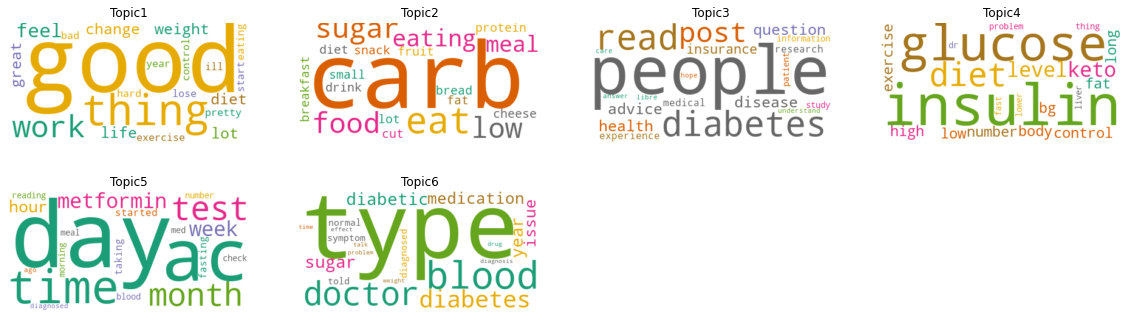

In [45]:
#word cloud
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()